## Trying to interpret singular vectors

In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve_lyapunov
from scipy.integrate import solve_ivp

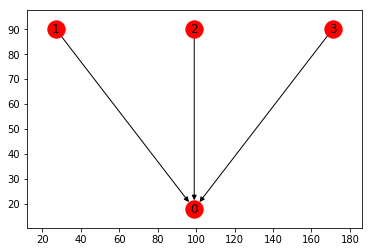

In [2]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
    (1,0),
    (2,0),
    (3,0)
])
N = nx.number_of_nodes(G)
nx.draw_networkx(G, pos=graphviz_layout(G, prog='dot'))

In [3]:
A = nx.adjacency_matrix(G).transpose()
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = A - D
np.linalg.matrix_rank(L)

1

### Symmetrization

In [4]:
def orth_matrix(A):
    u, s, vh = np.linalg.svd(A, full_matrices=True)
    M, N = u.shape[0], vh.shape[1]
    rcond = np.finfo(s.dtype).eps * max(M, N)
    tol = np.amax(s) * rcond
    num = np.sum(s > tol, dtype=int)
    Q = vh[0:num,:].T.conj()
    return Q

In [5]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [6]:
Q

matrix([[-0.8660254 ,  0.28867513,  0.28867513,  0.28867513]])

Create undirected graph from the equivalent Laplacian

In [7]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [8]:
eqL

matrix([[-2.25,  0.75,  0.75,  0.75],
        [ 0.75, -0.25, -0.25, -0.25],
        [ 0.75, -0.25, -0.25, -0.25],
        [ 0.75, -0.25, -0.25, -0.25]])

In [9]:
np.linalg.matrix_rank(eqL)

1

In [10]:
negG = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] < -1e-6):
            negG.add_edge(i,j)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


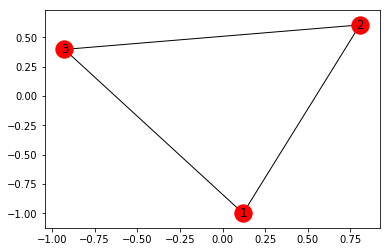

In [11]:
nx.draw_networkx(negG)

In [12]:
posG = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] > 1e-6):
            posG.add_edge(i,j)

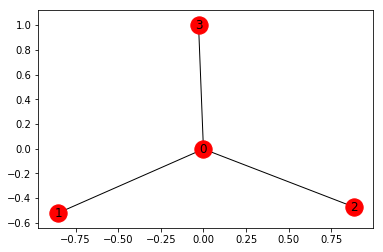

In [13]:
nx.draw_networkx(posG)

In [14]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        if(np.abs(eqL[i,j]) > 1e-6):
            eqG.add_edge(i,j,weight=eqL[i,j])

In [15]:
g_neg = eqG.subgraph([1,2,3,4,5])

In [16]:
np.linalg.eig(nx.laplacian_matrix(g_neg).todense())

(array([-7.50000000e-01, -5.55111512e-17, -7.50000000e-01]),
 matrix([[-0.81649658,  0.57735027,  0.11009638],
         [ 0.40824829,  0.57735027, -0.75569724],
         [ 0.40824829,  0.57735027,  0.64560086]]))

In [17]:
nx.laplacian_matrix(g_neg).todense()

matrix([[-0.5 ,  0.25,  0.25],
        [ 0.25, -0.5 ,  0.25],
        [ 0.25,  0.25, -0.5 ]])